In [1]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns
import plotly.express as px
import text2emotion as te
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import ImageColorGenerator, WordCloud, STOPWORDS
from textblob import TextBlob
from IPython.display import clear_output
from time import sleep
import missingno
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igorr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\igorr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\igorr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\igorr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv('reddit_wsb.csv')
data.tail()

title  score      id  \
32465  There needs to be a truce between Gme holders ...    128  le1c90   
32466                        Stay Vigilant and Skeptical     58  le1b97   
32467  Hard Truth: It's Entirely Mathematically Possi...     14  le1ate   
32468                                   DD Peloton $PTON     14  le192j   
32469                       Another 🧻🖐 loser checking in     29  le186v   

                                                     url  comms_num  \
32465  https://www.reddit.com/r/wallstreetbets/commen...        108   
32466  https://www.reddit.com/r/wallstreetbets/commen...         26   
32467  https://www.reddit.com/r/wallstreetbets/commen...         36   
32468  https://www.reddit.com/r/wallstreetbets/commen...         34   
32469              https://www.reddit.com/gallery/le186v         30   

            created                                               body  \
32465  1.612659e+09  This is getting ridiculous. Half the sub is ye...   
32466  1.612659e+09  There are so many imposters among us, and if y...   
32467  1.612659e+09  If a share can be shorted multiple times, it c...   
32468  1.612659e+09  Hello retards,\n\nI´m not sure if you are awar...   
32469  1.612659e+09                                                NaN   

                 timestamp  
32465  2021-02-07 02:47:01  
32466  2021-02-07 02:45:48  
32467  2021-02-07 02:45:22  
32468  2021-02-07 02:43:07  
32469  2021-02-07 02:41:53

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      32470 non-null  object 
 1   score      32470 non-null  int64  
 2   id         32470 non-null  object 
 3   url        32470 non-null  object 
 4   comms_num  32470 non-null  int64  
 5   created    32470 non-null  float64
 6   body       16848 non-null  object 
 7   timestamp  32470 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ MB


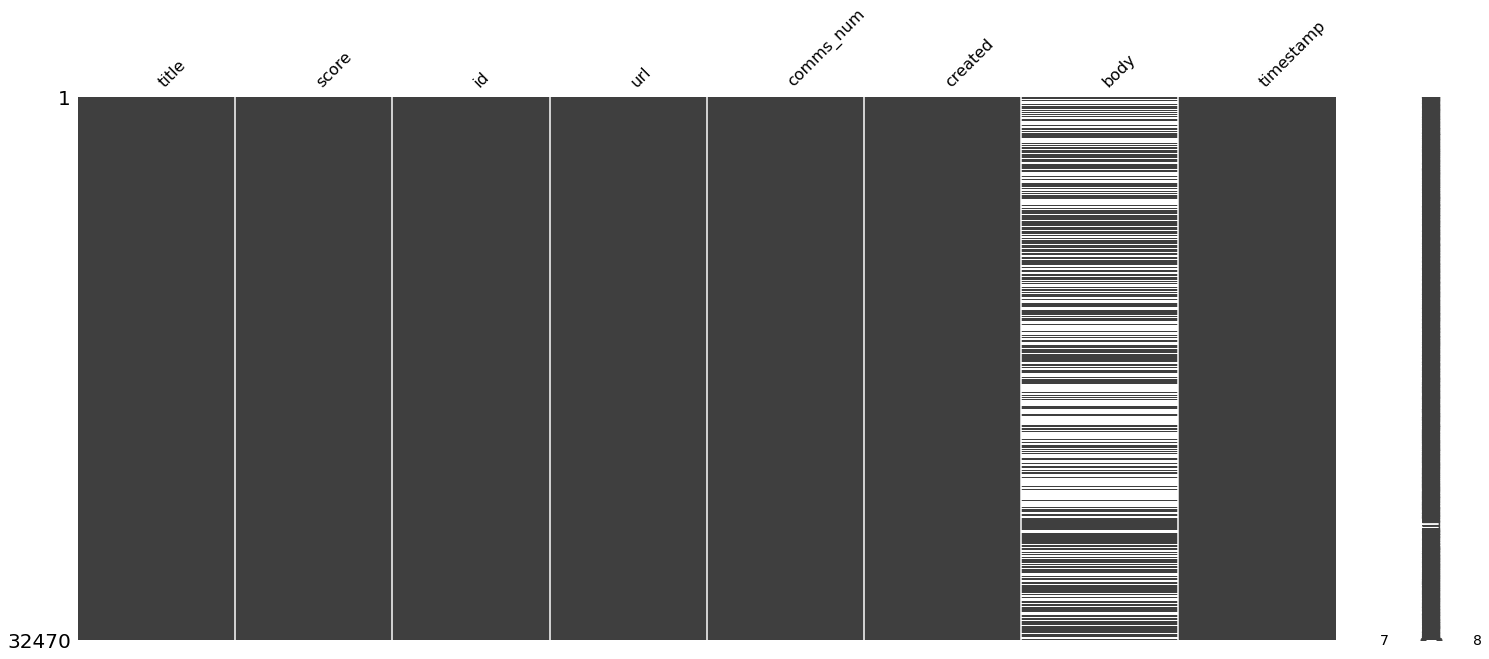

In [4]:
missingno.matrix(data)

In [15]:
def wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https","U", "fuck", "amp", "fucking", "dope", "guy"])
    wordcloud = WordCloud(stopwords=stopwords, scale=5, max_font_size=55, max_words=550,background_color="white").generate(text)
    fig = plt.figure(1, figsize=(18,18))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

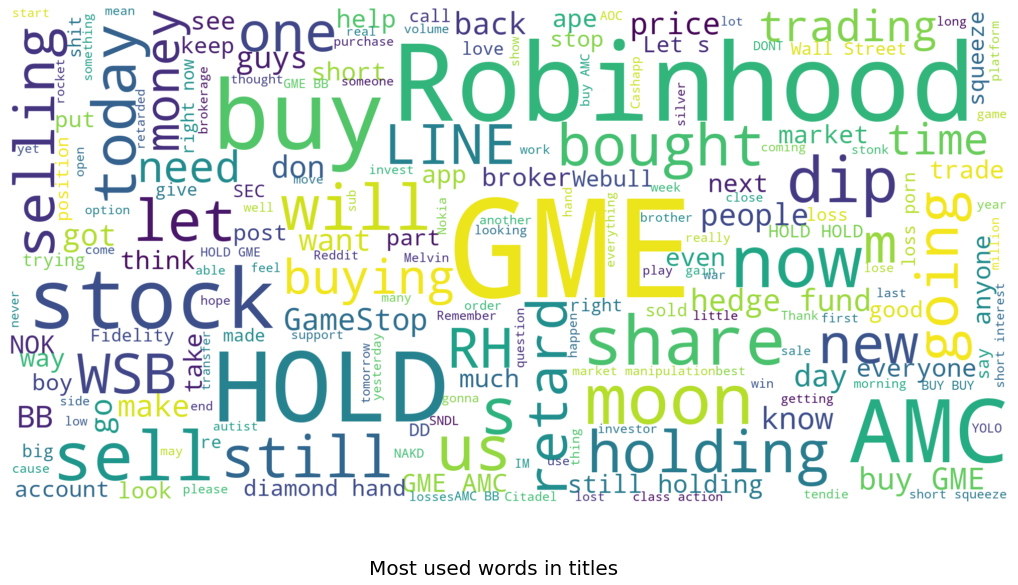

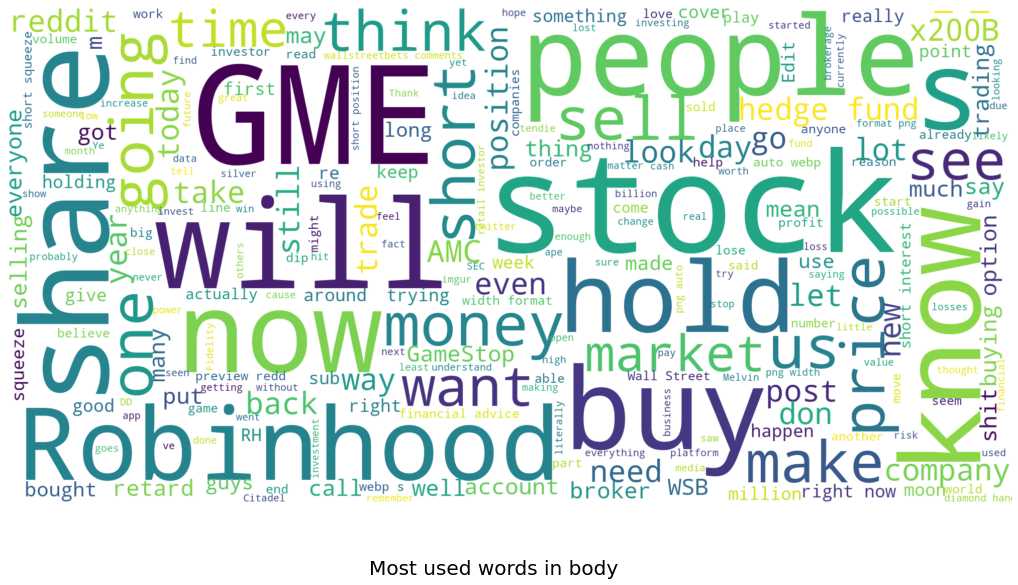

In [6]:
wordcloud(data['title'], title ="Most used words in titles")
wordcloud(data['body'], title ="Most used words in body")

In [7]:
#Uncover emotions
#data['OverallText'] = data.title + " " + data.body.astype(str)
#emotions = []
#from tqdm import tqdm_notebook as tqdm
#tqdm().pandas()
#for text in tqdm(data.OverallText):
    #emotions.append(te.get_emotion(str(text)))

In [8]:
emotions_data = pd.DataFrame.from_dict(emotions)
data['happy'] = emotions_data.Happy
data['angry'] = emotions_data.Angry
data['sad'] = emotions_data.Sad
data['fear'] = emotions_data.Fear
data['surprise'] = emotions_data.Surprise

data.head()

NameError: name 'emotions' is not defined

In [ ]:
emotions_data.head()

In [ ]:
dominant_emotion = []

for emotion in emotions_data.idxmax(axis=1):
    dominant_emotion.append(emotion)
    
data['dominant'] = dominant_emotion
data.head()

In [ ]:
data.to_csv('WSB_Sentiment_Analysis', index=False)

In [4]:
data = pd.read_csv('WSB_Sentiment_Analysis')

In [5]:
data.tail()

title  score      id  \
32465  There needs to be a truce between Gme holders ...    128  le1c90   
32466                        Stay Vigilant and Skeptical     58  le1b97   
32467  Hard Truth: It's Entirely Mathematically Possi...     14  le1ate   
32468                                   DD Peloton $PTON     14  le192j   
32469                       Another 🧻🖐 loser checking in     29  le186v   

                                                     url  comms_num  \
32465  https://www.reddit.com/r/wallstreetbets/commen...        108   
32466  https://www.reddit.com/r/wallstreetbets/commen...         26   
32467  https://www.reddit.com/r/wallstreetbets/commen...         36   
32468  https://www.reddit.com/r/wallstreetbets/commen...         34   
32469              https://www.reddit.com/gallery/le186v         30   

            created                                               body  \
32465  1.612659e+09  This is getting ridiculous. Half the sub is ye...   
32466  1.612659e+09  There are so many imposters among us, and if y...   
32467  1.612659e+09  If a share can be shorted multiple times, it c...   
32468  1.612659e+09  Hello retards,\n\nI´m not sure if you are awar...   
32469  1.612659e+09                                                NaN   

                 timestamp                                        OverallText  \
32465  2021-02-07 02:47:01  There needs to be a truce between Gme holders ...   
32466  2021-02-07 02:45:48  Stay Vigilant and Skeptical There are so many ...   
32467  2021-02-07 02:45:22  Hard Truth: It's Entirely Mathematically Possi...   
32468  2021-02-07 02:43:07  DD Peloton $PTON Hello retards,\n\nI´m not sur...   
32469  2021-02-07 02:41:53                   Another 🧻🖐 loser checking in nan   

       happy  angry   sad  fear  surprise dominant  
32465   0.10   0.15  0.35  0.15      0.25      Sad  
32466   0.13   0.10  0.23  0.30      0.23     Fear  
32467   0.03   0.32  0.08  0.51      0.05     Fear  
32468   0.07   0.03  0.26  0.50      0.14     Fear  
32469   0.00   0.00  1.00  0.00      0.00      Sad

Text(0.5, 1.0, 'Dominant Emotions per Post')

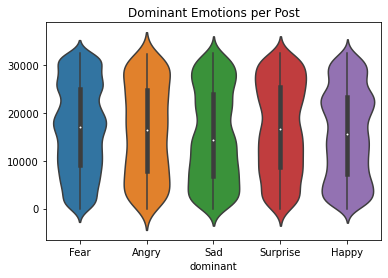

In [6]:
ax = sns.violinplot(x=data['dominant'], y=data.index, split=True, data=data)
ax.set_title('Dominant Emotions per Post')

In [7]:
#Set up the time
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
data['timestamp']=pd.to_datetime(data['timestamp'])
data['date']=data['timestamp'].dt.day
data['weekday']=data['timestamp'].dt.weekday
data['weekday']=data['weekday'].apply(lambda x: day_name[x])
data['hour']=data['timestamp'].dt.hour

In [8]:
data

title  score      id  \
0      It's not about the money, it's about sending a...     55  l6ulcx   
1      Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                        Exit the system      0  l6uhhn   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4      Not to distract from GME, just thought our AMC...     71  l6ufgy   
...                                                  ...    ...     ...   
32465  There needs to be a truce between Gme holders ...    128  le1c90   
32466                        Stay Vigilant and Skeptical     58  le1b97   
32467  Hard Truth: It's Entirely Mathematically Possi...     14  le1ate   
32468                                   DD Peloton $PTON     14  le192j   
32469                       Another 🧻🖐 loser checking in     29  le186v   

                                                     url  comms_num  \
0                        https://v.redd.it/6j75regs72e61          6   
1                        https://v.redd.it/ah50lyny62e61         23   
2      https://www.reddit.com/r/wallstreetbets/commen...         47   
3      https://sec.report/Document/0001193125-21-019848/         74   
4                    https://i.redd.it/4h2sukb662e61.jpg        156   
...                                                  ...        ...   
32465  https://www.reddit.com/r/wallstreetbets/commen...        108   
32466  https://www.reddit.com/r/wallstreetbets/commen...         26   
32467  https://www.reddit.com/r/wallstreetbets/commen...         36   
32468  https://www.reddit.com/r/wallstreetbets/commen...         34   
32469              https://www.reddit.com/gallery/le186v         30   

            created                                               body  \
0      1.611863e+09                                                NaN   
1      1.611862e+09                                                NaN   
2      1.611862e+09  The CEO of NASDAQ pushed to halt trading “to g...   
3      1.611862e+09                                                NaN   
4      1.611862e+09                                                NaN   
...             ...                                                ...   
32465  1.612659e+09  This is getting ridiculous. Half the sub is ye...   
32466  1.612659e+09  There are so many imposters among us, and if y...   
32467  1.612659e+09  If a share can be shorted multiple times, it c...   
32468  1.612659e+09  Hello retards,\n\nI´m not sure if you are awar...   
32469  1.612659e+09                                                NaN   

                timestamp                                        OverallText  \
0     2021-01-28 21:37:41  It's not about the money, it's about sending a...   
1     2021-01-28 21:32:10  Math Professor Scott Steiner says the numbers ...   
2     2021-01-28 21:30:35  Exit the system The CEO of NASDAQ pushed to ha...   
3     2021-01-28 21:28:57  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...   
4     2021-01-28 21:26:56  Not to distract from GME, just thought our AMC...   
...                   ...                                                ...   
32465 2021-02-07 02:47:01  There needs to be a truce between Gme holders ...   
32466 2021-02-07 02:45:48  Stay Vigilant and Skeptical There are so many ...   
32467 2021-02-07 02:45:22  Hard Truth: It's Entirely Mathematically Possi...   
32468 2021-02-07 02:43:07  DD Peloton $PTON Hello retards,\n\nI´m not sur...   
32469 2021-02-07 02:41:53                   Another 🧻🖐 loser checking in nan   

       happy  angry   sad  fear  surprise  dominant  date   weekday  hour  
0       0.00   0.00  0.00  1.00      0.00      Fear    28  Thursday    21  
1       0.00   0.25  0.25  0.25      0.25     Angry    28  Thursday    21  
2       0.00   0.07  0.25  0.68      0.00      Fear    28  Thursday    21  
3       0.00   0.00  1.00  0.00      0.00       Sad    28  Thursday    21  
4       0.00   0.00  0.50  0.00      0.50  Surprise    28  Thursday

In [9]:
px.histogram(data,x='weekday',color='weekday')

In [10]:
#data["date"] = pd.to_datetime(data.timestamp).dt.date
by_hour = data.groupby(["date", "hour"]).mean()

In [11]:
pd.options.plotting.backend = "plotly"

In [12]:
fig = by_hour.reset_index().plot(y = "happy", labels={
                     "happy": "Score ratio of each emotion", 
                     "index": "Hours since 9:00 AM, 1/28/2021"
                 },
                title="Emotions expressed by hour")
fig.add_scatter(y=by_hour['happy'], mode='lines', name = "Happy")
fig.add_scatter(y=by_hour['sad'], mode='lines', name = "Sad")
fig.add_scatter(y=by_hour['angry'], mode='lines', name = "Angry")
fig.add_scatter(y=by_hour['surprise'], mode='lines', name = "Surprise")
fig.add_scatter(y=by_hour['fear'], mode='lines', name = "Fear")
fig.show()

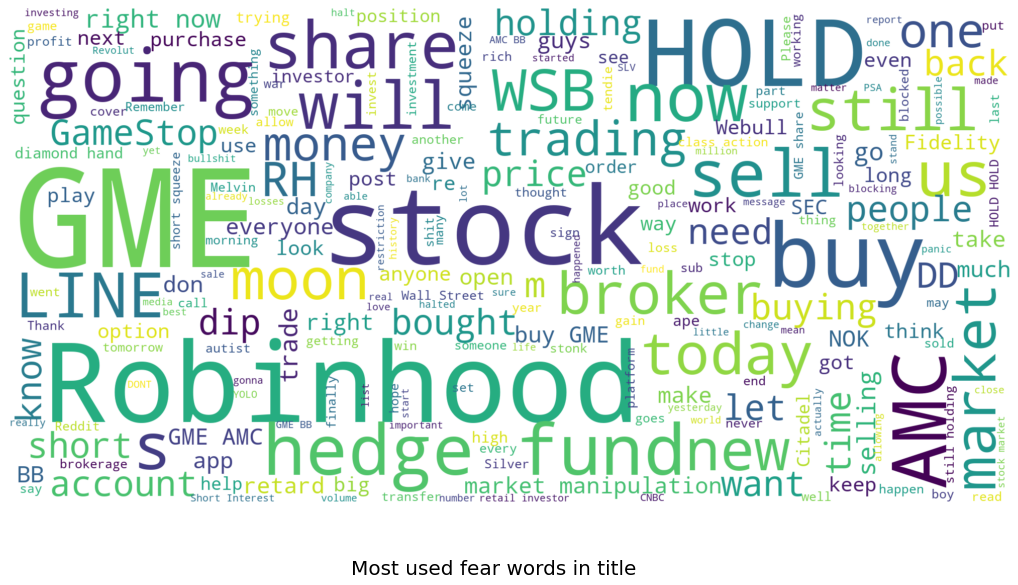

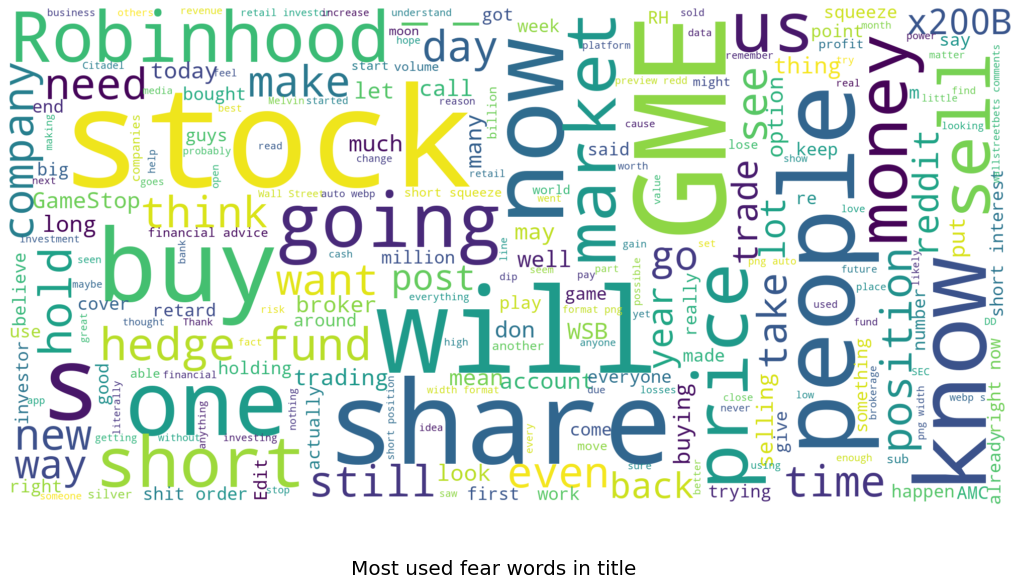

In [16]:
df1 = data[data['dominant'].str.contains("Fear")]

wordcloud(df1['title'], title= 'Most used fear words in title')
wordcloud(df1['body'], title= 'Most used fear words in title')

In [17]:
title_data = data[['title','timestamp']].copy()
body_data = data[['body','timestamp']].copy()

body_data = body_data.dropna()
title_data = title_data.dropna()

title_data.title = title_data.title.str.lower()
body_data.body = body_data.body.str.lower()

title_data

title           timestamp
0      it's not about the money, it's about sending a... 2021-01-28 21:37:41
1      math professor scott steiner says the numbers ... 2021-01-28 21:32:10
2                                        exit the system 2021-01-28 21:30:35
3      new sec filing for gme! can someone less retar... 2021-01-28 21:28:57
4      not to distract from gme, just thought our amc... 2021-01-28 21:26:56
...                                                  ...                 ...
32465  there needs to be a truce between gme holders ... 2021-02-07 02:47:01
32466                        stay vigilant and skeptical 2021-02-07 02:45:48
32467  hard truth: it's entirely mathematically possi... 2021-02-07 02:45:22
32468                                   dd peloton $pton 2021-02-07 02:43:07
32469                       another 🧻🖐 loser checking in 2021-02-07 02:41:53

[32470 rows x 2 columns]

In [18]:
#Remove URLS
title_data.title = title_data.title.apply(lambda x:re.sub(r"http\S+", "", x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r"http\S+", "", x))

#Remove all single characters
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

#Replace multiple spaces with a single one
title_data.title = title_data.title.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
body_data.body   = body_data.body.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

# Remove all the special characters
title_data.title = title_data.title.apply(lambda x:' '.join(re.findall(r'\w+', x)))
body_data.body   = body_data.body.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#Remove handles
title_data.title = title_data.title.apply(lambda x:re.sub('@[^\s]+','',x))
body_data.body   = body_data.body.apply(lambda x:re.sub('@[^\s]+','',x))

#Remove Time From Timestamp
title_data.timestamp = pd.to_datetime(title_data.timestamp).dt.date
body_data.timestamp = pd.to_datetime(body_data.timestamp).dt.date

In [19]:
print(body_data.shape)
print(title_data.shape)

(16848, 2)
(32470, 2)


In [20]:
title_data

title   timestamp
0      it s not about the money it s about sendingmes...  2021-01-28
1      math professor scott steiner says the numbers ...  2021-01-28
2                                        exit the system  2021-01-28
3      new sec filing for gme can someone less retard...  2021-01-28
4      not to distract from gme just thought our amc ...  2021-01-28
...                                                  ...         ...
32465  there needs to betruce between gme holders and...  2021-02-07
32466                        stay vigilant and skeptical  2021-02-07
32467  hard truth it s entirely mathematically possib...  2021-02-07
32468                                    dd peloton pton  2021-02-07
32469                          another loser checking in  2021-02-07

[32470 rows x 2 columns]

In [21]:
results = []

def Vader_SIA(data):
    for text in data:
        pol_score = SIA().polarity_scores(text) # run analysis
        results.append(pol_score)
             
    return(results)

In [22]:
Vader_SIA(title_data['title'])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.204, 'neu': 0.658, 'pos': 0.138, 'compound': -0.2748},
 {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.2235},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 

In [23]:
Vader_SIA(body_data['body'])

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.272, 'neu': 0.728, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.204, 'neu': 0.658, 'pos': 0.138, 'compound': -0.2748},
 {'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'compound': 0.2235},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 

In [24]:
body_data['compound'] = pd.DataFrame(results)['compound']
body_data['positive'] = pd.DataFrame(results)['pos']
body_data['negative'] = pd.DataFrame(results)['neg']
body_data['neutral'] = pd.DataFrame(results)['neu']

title_data['compound'] = pd.DataFrame(results)['compound']
title_data['positive'] = pd.DataFrame(results)['pos']
title_data['negative'] = pd.DataFrame(results)['neg']
title_data['neutral'] = pd.DataFrame(results)['neu']
title_data

title   timestamp  \
0      it s not about the money it s about sendingmes...  2021-01-28   
1      math professor scott steiner says the numbers ...  2021-01-28   
2                                        exit the system  2021-01-28   
3      new sec filing for gme can someone less retard...  2021-01-28   
4      not to distract from gme just thought our amc ...  2021-01-28   
...                                                  ...         ...   
32465  there needs to betruce between gme holders and...  2021-02-07   
32466                        stay vigilant and skeptical  2021-02-07   
32467  hard truth it s entirely mathematically possib...  2021-02-07   
32468                                    dd peloton pton  2021-02-07   
32469                          another loser checking in  2021-02-07   

       compound  positive  negative  neutral  
0        0.0000     0.000     0.000    1.000  
1       -0.6249     0.000     0.272    0.728  
2        0.0000     0.000     0.000    1.000  
3       -0.2748     0.138     0.204    0.658  
4        0.2235     0.119     0.000    0.881  
...         ...       ...       ...      ...  
32465    0.0000     0.000     0.000    1.000  
32466   -0.1531     0.283     0.383    0.333  
32467    0.2263     0.168     0.102    0.730  
32468    0.0000     0.000     0.000    1.000  
32469   -0.5267     0.000     0.531    0.469  

[32470 rows x 6 columns]

In [25]:
sentiment = []
def Final_Sentiment(data):
    for score in data:
        if score >=0.05:
            sentiment.append('Positive')
        elif score <= - 0.05:
            sentiment.append('Negative')
        else:
            sentiment.append('Neutral')
    #return(sentiment)

In [26]:
Final_Sentiment(title_data['compound'])
title_data['sentiment'] = pd.DataFrame(sentiment)
title_data

title   timestamp  \
0      it s not about the money it s about sendingmes...  2021-01-28   
1      math professor scott steiner says the numbers ...  2021-01-28   
2                                        exit the system  2021-01-28   
3      new sec filing for gme can someone less retard...  2021-01-28   
4      not to distract from gme just thought our amc ...  2021-01-28   
...                                                  ...         ...   
32465  there needs to betruce between gme holders and...  2021-02-07   
32466                        stay vigilant and skeptical  2021-02-07   
32467  hard truth it s entirely mathematically possib...  2021-02-07   
32468                                    dd peloton pton  2021-02-07   
32469                          another loser checking in  2021-02-07   

       compound  positive  negative  neutral sentiment  
0        0.0000     0.000     0.000    1.000   Neutral  
1       -0.6249     0.000     0.272    0.728  Negative  
2        0.0000     0.000     0.000    1.000   Neutral  
3       -0.2748     0.138     0.204    0.658  Negative  
4        0.2235     0.119     0.000    0.881  Positive  
...         ...       ...       ...      ...       ...  
32465    0.0000     0.000     0.000    1.000   Neutral  
32466   -0.1531     0.283     0.383    0.333  Negative  
32467    0.2263     0.168     0.102    0.730  Positive  
32468    0.0000     0.000     0.000    1.000   Neutral  
32469   -0.5267     0.000     0.531    0.469  Negative  

[32470 rows x 7 columns]

In [27]:
Final_Sentiment(body_data['compound'])
body_data['sentiment'] = pd.DataFrame(sentiment)
body_data

body   timestamp  \
2      the ceo of nasdaq pushed to halt trading to gi...  2021-01-28   
6      hedgefund whales are spreading disinfo saying ...  2021-01-28   
7      life isn t fair my mother always told me that ...  2021-01-28   
10     believe right now is one of those rare opportu...  2021-01-28   
12     you guys are champs gme who would have thought...  2021-01-28   
...                                                  ...         ...   
32461  wsb hashuge number of new users many of whom a...  2021-02-07   
32465  this is getting ridiculous half the sub is yel...  2021-02-07   
32466  there are so many imposters among us and if yo...  2021-02-07   
32467  ifshare can be shorted multiple times it can b...  2021-02-07   
32468  hello retards i m not sure if you are aware bu...  2021-02-07   

       compound  positive  negative  neutral sentiment  
2        0.0000     0.000     0.000    1.000   Neutral  
6        0.0000     0.000     0.000    1.000   Neutral  
7        0.0000     0.000     0.000    1.000   Neutral  
10       0.0000     0.000     0.000    1.000   Neutral  
12       0.0000     0.000     0.000    1.000   Neutral  
...         ...       ...       ...      ...       ...  
32461    0.4404     0.326     0.000    0.674  Positive  
32465    0.0000     0.000     0.000    1.000   Neutral  
32466   -0.1531     0.283     0.383    0.333  Negative  
32467    0.2263     0.168     0.102    0.730  Positive  
32468    0.0000     0.000     0.000    1.000   Neutral  

[16848 rows x 7 columns]

In [28]:
def sentiment_plot(data, feature, title):
    counts = data[feature].value_counts()
    percent = counts/sum(counts)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))
    counts.plot(kind='bar', ax=ax1, color='orange')
    percent.plot(kind='bar', ax=ax2, color='red')
    ax1.set_ylabel(f'Counts : {title} sentiment', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiment', size=12)
    plt.tight_layout()
    plt.show()

TypeError: bar() got an unexpected keyword argument 'ax'

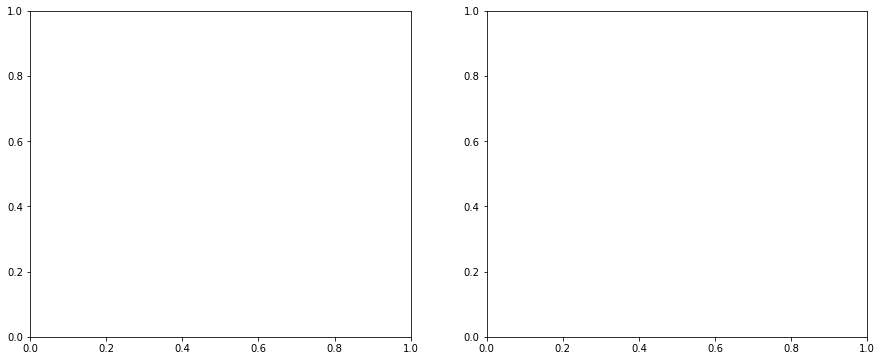

In [29]:
sentiment_plot(title_data, 'sentiment', 'Title')
sentiment_plot(body_data, 'sentiment', 'Title')

In [ ]:
wordcloud(title_data.loc[title_data['sentiment']=='Positive', 'title'], 
               title = 'Most used positive sentiment words in titles')
wordcloud(title_data.loc[title_data['sentiment']=='Negative', 'title'], 
               title = 'Most used negative sentiment words in titles')

In [ ]:
wordcloud(body_data.loc[body_data['sentiment']=='Positive', 'body'], 
               title = 'Most used positive sentiment words in bodies')
wordcloud(body_data.loc[body_data['sentiment']=='Negative', 'body'], 
               title = 'Most used negative sentiment words in bodies')

In [ ]:
ax = sns.boxplot(x=title_data['sentiment'], y=title_data['compound'], data=title_data)
ax.set_title('Sentiment strength')

In [ ]:
ax = sns.boxplot(x=body_data['sentiment'], y=body_data['compound'], data=body_data)
ax.set_title('Sentiment strength')

In [ ]:
def Textblob_Polarity(text):
    blob = TextBlob(text)
    polarity_score = 0
    for sentence in blob.sentences:
        polarity_score += sentence.sentiment.polarity
    return polarity_score

def TextBlob_Subjectivity(text):
    blob = TextBlob(text)
    subjectivity_score = 0
    for sentence in blob.sentences:
        subjectivity_score += sentence.sentiment.subjectivity
    return subjectivity_score

In [ ]:
title_data['polarity'] = title_data['title'].apply(lambda x: Textblob_Polarity(x))
title_data['subjectivity'] = title_data['title'].apply(lambda x: TextBlob_Subjectivity(x))

body_data['polarity'] = body_data['body'].apply(lambda x: Textblob_Polarity(x))
body_data['subjectivity'] = body_data['body'].apply(lambda x: TextBlob_Subjectivity(x))

In [ ]:
title_data

In [ ]:
def textblob_sentiment(df, feature, title):
    polarity = df['polarity']
    subjectivity = df['subjectivity']
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    polarity.plot(kind='kde', ax=ax1, color='magenta')
    subjectivity.plot(kind='kde', ax=ax2, color='green')
    ax1.set_ylabel(f'Sentiment polarity in {title}', size=12)
    ax2.set_ylabel(f'Sentiment subjectivity in {title}', size=12)
    plt.tight_layout()
    plt.show()

In [ ]:
textblob_sentiment(title_data, 'title', 'title')
textblob_sentiment(body_data, 'body', 'body')

In [ ]:
title_data['date']=data['timestamp'].dt.day
title_data['hour']=data['timestamp'].dt.hour
by_day = title_data.groupby("date").mean()

fig = by_day.reset_index().plot(y = "compound", labels={
                     "compound": "Score ratios of each sentiment", 
                     "index": "Days from 1/28/2021"
                 },
                title="Title Sentiment scores by day")
fig.add_scatter(y=by_day['subjectivity'], mode='lines', name = "Subjectivity")
fig.add_scatter(y=by_day['compound'], mode='lines', name = "Compound")
fig.add_scatter(y=by_day['polarity'], mode='lines', name = "Polarity")
fig.add_scatter(y=by_day['positive'], mode='lines', name = "Positive")
fig.add_scatter(y=by_day['negative'], mode='lines', name = "Negative")



fig.show()

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [5]:
text = 'Hello my dear algotraders! I hope that this article is enjoyable to read. I wish you the best of luck in your endeavours'

sentence_tokenization = sent_tokenize(text)
sentence_tokenization

['Hello my dear algotraders!',
 'I hope that this article is enjoyable to read.',
 'I wish you the best of luck in your endeavours']

In [6]:
word_tokenization = word_tokenize(text)
word_tokenization

['Hello',
 'my',
 'dear',
 'algotraders',
 '!',
 'I',
 'hope',
 'that',
 'this',
 'article',
 'is',
 'enjoyable',
 'to',
 'read',
 '.',
 'I',
 'wish',
 'you',
 'the',
 'best',
 'of',
 'luck',
 'in',
 'your',
 'endeavours']

In [7]:
freq_dist = FreqDist(word_tokenization)
freq_dist.most_common(1)

[('I', 2)]

In [8]:
stop_words=set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
ps = PorterStemmer()
example_words = ["python","pythoner","pythoning","pythoned"]

for w in example_words:
    print(ps.stem(w))

python
python
python
python


In [10]:
lem = WordNetLemmatizer()

word = "frying"
print("Lemmatization:",lem.lemmatize(word,"v"))
print("Stemming:",ps.stem(word))

Lemmatization: fry
Stemming: fri


In [37]:
model_data = body_data[['body', 'sentiment']].copy()

def recoding(data):
    if data == 'Positive':
        return 1
    elif data == 'Negative':
        return -1
    else:
        return 0

model_data['sentiment'] = model_data['sentiment'].apply(recoding)
model_data.tail()

body  sentiment
32461  wsb hashuge number of new users many of whom a...          1
32465  this is getting ridiculous half the sub is yel...          0
32466  there are so many imposters among us and if yo...         -1
32467  ifshare can be shorted multiple times it can b...          1
32468  hello retards i m not sure if you are aware bu...          0

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
cv = CountVectorizer(stop_words='english')
text_matrix = cv.fit_transform(model_data['body'])
text_matrix

NameError: name 'model_data' is not defined

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    text_matrix, model_data['sentiment'], test_size=0.2, random_state=42)

In [67]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_train)
print("Accuracy of classifier:",metrics.accuracy_score(y_train, predicted))

Accuracy of classifier: 0.7636889746253154


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
tf_id = TfidfVectorizer()
text_td_id_matrix = tf_id.fit_transform(model_data['body'])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    text_td_id_matrix, model_data['sentiment'], test_size=0.2, random_state=42)

In [82]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_train)
print("Accuracy of classifier:",metrics.accuracy_score(y_train, predicted))

Accuracy of classifier: 0.5405104614928031


In [40]:
from sklearn.linear_model import LogisticRegression

In [145]:
X_train, X_test, y_train, y_test = train_test_split(
    text_td_id_matrix, model_data['sentiment'], test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train, y_train)

predicted = logreg.predict(X_train)
print("Accuracy of classifier:",metrics.accuracy_score(y_train, predicted))

Accuracy of classifier: 0.6401543255675917


In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    text_matrix, model_data['sentiment'], test_size=0.2, random_state=42)

logreg = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train, y_train)

predicted = logreg.predict(X_train)
print("Accuracy of classifier:",metrics.accuracy_score(y_train, predicted))

Accuracy of classifier: 0.8253450066775486


In [2]:
import scikitplot as skplt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import plot_confusion_matrix

Accuracy:
0.5
[[ 124  553  119]
 [ 163 1410  215]
 [  79  556  151]]


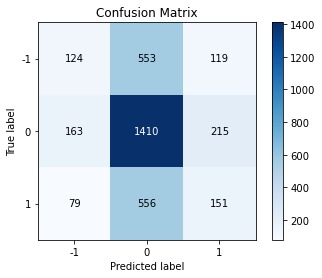

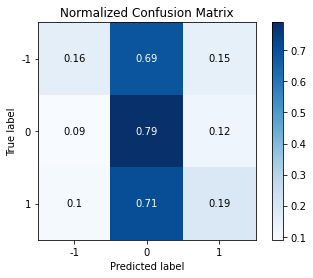

              precision    recall  f1-score   support

          -1       0.34      0.16      0.21       796
           0       0.56      0.79      0.65      1788
           1       0.31      0.19      0.24       786

    accuracy                           0.50      3370
   macro avg       0.40      0.38      0.37      3370
weighted avg       0.45      0.50      0.45      3370



In [62]:
prediction = logreg.predict(X_test)
print("Accuracy:")
response = accuracy_score(y_test,prediction)
print(response)

prediction = dict()
prediction['Logistic'] = logreg.predict(X_test)

confusion_matrix = cm(y_test, prediction['Logistic'])
print(confusion_matrix)


skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['Logistic'],normalize=True)
plt.show()

print(classification_report(y_test, prediction['Logistic']))

In [109]:
model_data = title_data[['title', 'sentiment']].copy()
model_data['sentiment'] = model_data['sentiment'].apply(recoding)
model_data = model_data[model_data.sentiment != 0]
model_data

title  sentiment
1      math professor scott steiner says the numbers ...         -1
3      new sec filing for gme can someone less retard...         -1
4      not to distract from gme just thought our amc ...          1
8      currently holding amc and nok is it retarded t...         -1
11                           gme premarket musk approved          1
...                                                  ...        ...
32463                               300 investors strong          1
32464  amc gain softcore porn bought at around 4 8 an...          1
32466                        stay vigilant and skeptical         -1
32467  hard truth it s entirely mathematically possib...          1
32469                          another loser checking in         -1

[16514 rows x 2 columns]

In [110]:
title_matrix = cv.fit_transform(model_data['title'])
title_matrix

<16514x14696 sparse matrix of type '<class 'numpy.int64'>'
	with 115196 stored elements in Compressed Sparse Row format>

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    title_matrix, model_data['sentiment'], test_size=0.2, random_state=42)

Accuracy:
0.877989706327581
[[1363  194]
 [ 209 1537]]


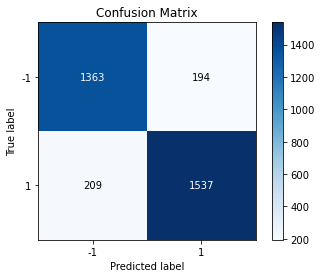

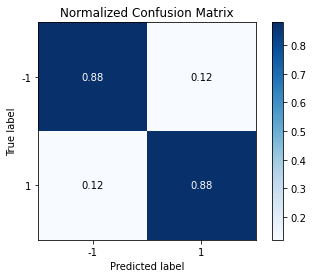

              precision    recall  f1-score   support

          -1       0.87      0.88      0.87      1557
           1       0.89      0.88      0.88      1746

    accuracy                           0.88      3303
   macro avg       0.88      0.88      0.88      3303
weighted avg       0.88      0.88      0.88      3303



In [112]:
logreg = LogisticRegression(solver='liblinear', multi_class='auto').fit(X_train, y_train)

prediction = logreg.predict(X_test)
print("Accuracy:")
response = accuracy_score(y_test,prediction)
print(response)

prediction = dict()
prediction['Logistic'] = logreg.predict(X_test)

confusion_matrix = cm(y_test, prediction['Logistic'])
print(confusion_matrix)


skplt.metrics.plot_confusion_matrix(y_test, prediction['Logistic'])
plt.show()
skplt.metrics.plot_confusion_matrix(y_test,prediction['Logistic'],normalize=True)
plt.show()

print(classification_report(y_test, prediction['Logistic']))